In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
data = pd.read_csv('../data/csv/cleaned/ta-airasia-clean.csv')
data.head()

,text,label
0,"Perjalanan pakai airasia dari jkt ke batam, ko...",0
1,Air Asia adalah salah satu flight terburuk sel...,0
2,Sekali2 nya nyoba AirAsia ternyata pelayananny...,0
3,"Sangat kecewa dengan masakapai ini, meniningan...",0
4,"Udah di diperjalanan ke bandara, tiba tiba pen...",0


In [55]:
label_counts = data['label'].value_counts()
print('Jumlah data pada setiap nilai label:\n', label_counts)

Jumlah data pada setiap nilai label:
 1    600
0    199
Name: label, dtype: int64


In [56]:
print("Jumlah data: ", len(data))
print("Jumlah ulasan positif: ", data['label'].value_counts()[1])
print("Jumlah ulasan negatif: ", data['label'].value_counts()[0])

Jumlah data:  799
Jumlah ulasan positif:  600
Jumlah ulasan negatif:  199


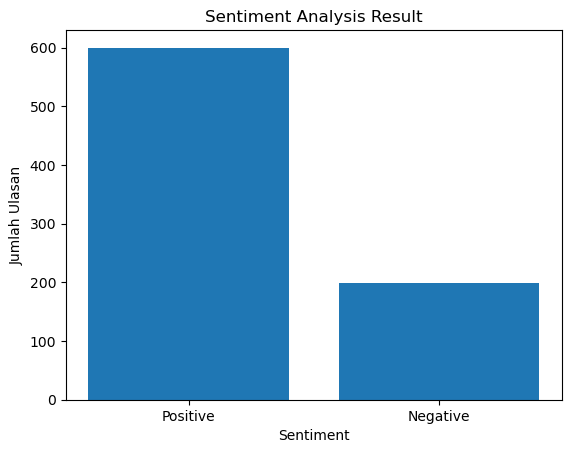

In [57]:
jumlah_positif = data['label'].value_counts()[1]
jumlah_negatif = data['label'].value_counts()[0]

plt.bar(['Positive', 'Negative'], [jumlah_positif, jumlah_negatif])
plt.title('Sentiment Analysis Result')
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Ulasan')
plt.show()

In [58]:
import re

def casefolding(text):
    text = text.lower()                                # Mengubah teks menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)            # Menghapus angka
    text = re.sub(r'[^\w\s]','', text)                 # Menghapus karakter tanda baca
    text = text.strip()
    return text
data['text'] = data['text'].apply(casefolding)


In [59]:
print(data['text'].head())

0    perjalanan pakai airasia dari jkt ke batam kop...
1    air asia adalah salah satu flight terburuk sel...
2    sekali nya nyoba airasia ternyata pelayanannya...
3    sangat kecewa dengan masakapai ini meniningan ...
4    udah di diperjalanan ke bandara tiba tiba pene...
Name: text, dtype: object


In [60]:
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

more_stopword=['href','a','b','br']
stopwords_ind=stopwords_ind+more_stopword

def remove_stop_words(text):
    clean_words=[]
    text=text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [61]:
print(data['text'])

0      perjalanan pakai airasia dari jkt ke batam kop...
1      air asia adalah salah satu flight terburuk sel...
2      sekali nya nyoba airasia ternyata pelayanannya...
3      sangat kecewa dengan masakapai ini meniningan ...
4      udah di diperjalanan ke bandara tiba tiba pene...
                             ...                        
794    setelah lama tidak menggunakan maskapai ini dg...
795    maskapai dengan harga murah dan layanan gak mu...
796    naik air asia overall sangat nyaman harganya b...
797    pertama kali terbang dengan penerbangan kelas ...
798    sesuai dengan judul saya airasia memang selalu...
Name: text, Length: 799, dtype: object


In [62]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
  text = stemmer.stem(text)
  return text

In [63]:
raw_sample = data['text'].iloc[7]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopword_removal)

print('Raw data\t\t: ', raw_sample)
print('Case folding\t\t: ', case_folding)
print('Stopword removal\t: ', stopword_removal)
print('Stemming\t\t: ', text_stemming)

Raw data		:  saat saya menulis ulasan ini saya masih menunggu kedatangan pesawat airasia yang akan menerbangkan saya dr lombok ke jakarta keterlambatan sdh  menit dan mungkin akan delay jam karena pesawat belum mendarat dr kl ke lop akibatnya mungkin waktu saya untuk transfer ke pesawat berikutnya akan sangat sempit saya tdk merekomendasikan maskapai ini
Case folding		:  saat saya menulis ulasan ini saya masih menunggu kedatangan pesawat airasia yang akan menerbangkan saya dr lombok ke jakarta keterlambatan sdh  menit dan mungkin akan delay jam karena pesawat belum mendarat dr kl ke lop akibatnya mungkin waktu saya untuk transfer ke pesawat berikutnya akan sangat sempit saya tdk merekomendasikan maskapai ini
Stopword removal	:  menulis ulasan menunggu kedatangan pesawat airasia menerbangkan dr lombok jakarta keterlambatan sdh menit delay jam pesawat mendarat dr kl lop akibatnya transfer pesawat sempit tdk merekomendasikan maskapai
Stemming		:  tulis ulas tunggu datang pesawat airasia t

In [64]:
def text_preprocessing_process(text):
    text=casefolding(text)
    text=remove_stop_words(text)
    text=stemming(text)
    return text

In [65]:
%%time
data['clean_text']=data['text'].apply(text_preprocessing_process)

CPU times: total: 5min 5s
Wall time: 5min 15s


In [66]:
import nltk
nltk.download('punkt')

data['tokens'] = data['clean_text'].apply(lambda x: nltk.word_tokenize(x))
print(data['tokens'])

0      [jalan, pakai, airasia, jkt, batam, koper, kon...
1      [air, asia, salah, flight, buruk, lion, air, y...
2      [nya, nyoba, airasia, layan, buruk, delaynya, ...
3      [kecewa, masakapai, ting, maskapai, layan, buruk]
4      [udah, jalan, bandara, terbang, cancel, ganti,...
                             ...                        
794    [maskapai, dg, poin, yougov, potong, yg, lumay...
795    [maskapai, harga, murah, layan, gak, murah, ja...
796    [air, asia, overall, nyaman, harga, saing, mur...
797    [kali, terbang, terbang, kelas, ekonomi, tp, w...
798    [sesuai, judul, airasia, promonya, promo, big,...
Name: tokens, Length: 799, dtype: object


[nltk_data] Downloading package punkt to C:\Users\NAUFAL
[nltk_data]     HAFIZH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [67]:
data

,text,label,clean_text,tokens
0,perjalanan pakai airasia dari jkt ke batam kop...,0,jalan pakai airasia jkt batam koper kondisi lo...,"[jalan, pakai, airasia, jkt, batam, koper, kon..."
1,air asia adalah salah satu flight terburuk sel...,0,air asia salah flight buruk lion air yg gate m...,"[air, asia, salah, flight, buruk, lion, air, y..."
2,sekali nya nyoba airasia ternyata pelayanannya...,0,nya nyoba airasia layan buruk delaynya jam kom...,"[nya, nyoba, airasia, layan, buruk, delaynya, ..."
3,sangat kecewa dengan masakapai ini meniningan ...,0,kecewa masakapai ting maskapai layan buruk,"[kecewa, masakapai, ting, maskapai, layan, buruk]"
4,udah di diperjalanan ke bandara tiba tiba pene...,0,udah jalan bandara terbang cancel ganti rugi r...,"[udah, jalan, bandara, terbang, cancel, ganti,..."
...,...,...,...,...
794,setelah lama tidak menggunakan maskapai ini dg...,1,maskapai dg poin yougov potong yg lumayan bera...,"[maskapai, dg, poin, yougov, potong, yg, lumay..."
795,maskapai dengan harga murah dan layanan gak mu...,1,maskapai harga murah layan gak murah jalan nya...,"[maskapai, harga, murah, layan, gak, murah, ja..."
796,naik air asia overall sangat nyaman harganya b...,1,air asia overall nyaman harga saing murah dela...,"[air, asia, overall, nyaman, harga, saing, mur..."
797,pertama kali terbang dengan penerbangan kelas ...,1,kali terbang terbang kelas ekonomi tp walupun ...,"[kali, terbang, terbang, kelas, ekonomi, tp, w..."


In [68]:
data.to_csv('../data/csv/cleaned/lion-w2v-trial.csv')

In [69]:
import gensim
gensim.__version__

'4.3.0'

In [70]:
def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = data['clean_text'].apply(lambda x: tokenization(x.lower()))
sentences

0      [jalan, pakai, airasia, jkt, batam, koper, kon...
1      [air, asia, salah, flight, buruk, lion, air, y...
2      [nya, nyoba, airasia, layan, buruk, delaynya, ...
3      [kecewa, masakapai, ting, maskapai, layan, buruk]
4      [udah, jalan, bandara, terbang, cancel, ganti,...
                             ...                        
794    [maskapai, dg, poin, yougov, potong, yg, lumay...
795    [maskapai, harga, murah, layan, gak, murah, ja...
796    [air, asia, overall, nyaman, harga, saing, mur...
797    [kali, terbang, terbang, kelas, ekonomi, tp, w...
798    [sesuai, judul, airasia, promonya, promo, big,...
Name: clean_text, Length: 799, dtype: object

In [71]:
MIN_COUNT = 1       # Mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
WINDOW = 5          # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah kalimat.
EPOCH = 15          # Jumlah iterasi (epoch).
SG = 1              # Algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW.
SIZE = 5

In [72]:
%%time 
model_word2vec = gensim.models.Word2Vec(sentences, vector_size=SIZE, sg=SG, min_count=MIN_COUNT, window=WINDOW, epochs=EPOCH)

CPU times: total: 1.41 s
Wall time: 782 ms


In [73]:
path = "word2vec.bin.gz"
model_word2vec.wv.save_word2vec_format(path, binary=True)

In [74]:
model_word2vec.wv['telat']

array([-0.00978349,  0.9033001 ,  1.1393175 , -0.40544733, -0.41448224],
      dtype=float32)

In [75]:
model_word2vec.wv.most_similar('telat')

[('surabayajakarta', 0.9990957379341125),
 ('gapapa', 0.9985796809196472),
 ('blm', 0.9978711605072021),
 ('nan', 0.9972862601280212),
 ('kul', 0.9966803193092346),
 ('instan', 0.9961388111114502),
 ('pattaya', 0.9960379600524902),
 ('benefit', 0.9954914450645447),
 ('coz', 0.9950017929077148),
 ('komitmen', 0.9949425458908081)]

In [76]:
word_list = ['tepat', 'nyaman', 'bagus', 'ramah', 'senang']
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
word_vectors

array([[-0.03661669,  1.3623127 ,  0.7501377 , -1.0523406 ,  0.252749  ],
       [ 0.3611916 ,  1.3084203 ,  0.71624696, -1.600832  ,  0.64135695],
       [-0.09814639,  1.8708504 ,  0.8365989 , -1.591286  ,  0.80052453],
       [ 0.7631335 ,  1.3560238 ,  0.7963117 , -1.5522696 ,  0.84433967],
       [ 0.0091416 ,  1.5123439 ,  0.38901174, -0.901584  , -0.20266797]],
      dtype=float32)

In [77]:
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [78]:
red_word_vectors

array([[ 0.63498783,  0.04921138],
       [-0.5459452 , -0.37334722],
       [-0.47217047,  1.6589394 ],
       [-1.0336697 , -0.99547213],
       [ 1.4167974 , -0.33933073]], dtype=float32)

In [79]:
def plot(datas, labels, fc='yellow'):
  # plot the dots
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  # annotate labels
  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

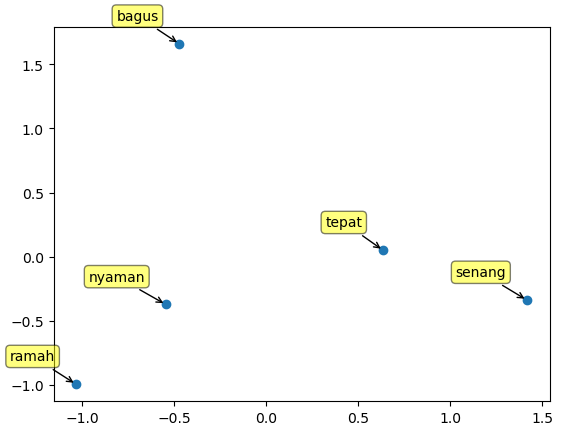

In [80]:
plot(red_word_vectors, word_list)

In [81]:
data1 = data[['clean_text', 'label']]
data1

,clean_text,label
0,jalan pakai airasia jkt batam koper kondisi lo...,0
1,air asia salah flight buruk lion air yg gate m...,0
2,nya nyoba airasia layan buruk delaynya jam kom...,0
3,kecewa masakapai ting maskapai layan buruk,0
4,udah jalan bandara terbang cancel ganti rugi r...,0
...,...,...
794,maskapai dg poin yougov potong yg lumayan bera...,1
795,maskapai harga murah layan gak murah jalan nya...,1
796,air asia overall nyaman harga saing murah dela...,1
797,kali terbang terbang kelas ekonomi tp walupun ...,1


In [82]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=5)
data_train, data_val = train_test_split(data_train, test_size=0.25, random_state=5)

In [83]:
print(data_train.shape)
print(data_val.shape)
print(data_test.shape)

(479, 4)
(160, 4)
(160, 4)


In [84]:
trainX = np.array(data_train.iloc[:, 0])
trainY = np.array(data_train.iloc[:, 1])

testX = np.array(data_test.iloc[:, 0])
testY = np.array(data_test.iloc[:, 1])

valX = np.array(data_val.iloc[:, 0])
valY = np.array(data_val.iloc[:, 1])

In [85]:
trainY = pd.get_dummies(trainY).values
testY = pd.get_dummies(testY).values
valY = pd.get_dummies(valY).values

In [86]:
print(trainY.shape)
print(testY.shape)
print(valY.shape)

(479, 2)
(160, 2)
(160, 2)


In [87]:
trainY

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0,

In [88]:
from gensim.models import KeyedVectors

reloaded_word_vectors = KeyedVectors.load_word2vec_format(path, binary=True)
print(reloaded_word_vectors)

KeyedVectors<vector_size=5, 3278 keys>


In [89]:
from keras.preprocessing.text import Tokenizer

NUM_WORDS = 100
OOV_TOKEN = '<unk>'

tokenizer = Tokenizer(num_words=100, oov_token=OOV_TOKEN, lower=True)   
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

word_index = tokenizer.word_index
print(word_index)

{'<unk>': 1, 'yang': 2, 'dan': 3, 'saya': 4, 'dengan': 5, 'di': 6, 'penerbangan': 7, 'air': 8, 'tidak': 9, 'untuk': 10, 'asia': 11, 'ke': 12, 'ini': 13, 'pesawat': 14, 'dari': 15, 'airasia': 16, 'sangat': 17, 'maskapai': 18, 'cukup': 19, 'kami': 20, 'ada': 21, 'karena': 22, 'harga': 23, 'bisa': 24, 'waktu': 25, 'juga': 26, 'murah': 27, 'terbang': 28, 'saat': 29, 'pelayanan': 30, 'tiket': 31, 'nyaman': 32, 'tapi': 33, 'baik': 34, 'promo': 35, 'lebih': 36, 'delay': 37, 'sudah': 38, 'menggunakan': 39, 'kali': 40, 'penumpang': 41, 'yg': 42, 'bagasi': 43, 'jam': 44, 'itu': 45, 'dalam': 46, 'hanya': 47, 'makanan': 48, 'jadi': 49, 'perjalanan': 50, 'selalu': 51, 'ramah': 52, 'harus': 53, 'naik': 54, 'kita': 55, 'sampai': 56, 'nya': 57, 'pada': 58, 'adalah': 59, 'in': 60, 'banyak': 61, 'tepat': 62, 'beberapa': 63, 'lagi': 64, 'kursi': 65, 'namun': 66, 'lain': 67, 'indonesia': 68, 'selama': 69, 'dapat': 70, 'sering': 71, 'pertama': 72, 'jadwal': 73, 'bersama': 74, 'duduk': 75, 'akan': 76, 'sepe

In [90]:
len(word_index)

3574

In [91]:
train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

print(train_seqs)

[[1, 1, 51, 1, 14, 16, 1, 1, 24, 1, 1, 14, 26, 32, 87, 52, 52, 26, 1, 1], [7, 72, 74, 1, 42, 17, 82, 3, 1, 7, 2, 62, 25, 82, 3, 27, 1, 1], [30, 14, 32, 3, 1, 1, 87, 3, 1, 42, 52, 17, 1, 28, 74, 8, 11], [38, 1, 1, 1, 4, 54, 18, 13, 1, 1, 2, 4, 1, 13, 27, 1, 23, 1, 1, 1, 9, 1, 29, 45, 81, 1, 1, 1, 1, 14, 77, 54, 1, 1, 1, 30, 1, 1, 9, 1, 48, 78, 1, 66, 55, 70, 1, 92, 1], [4, 1, 39, 18, 13, 12, 1, 1, 22, 51, 21, 35, 5, 1, 13, 18, 13, 1, 1, 23, 35, 1, 41, 1, 1, 1, 1, 46, 7, 13, 52, 3, 1, 1, 41, 1, 26, 1, 1, 1, 41, 2, 1, 1, 1], [1, 83, 1, 1, 1, 3, 1, 1, 1, 48, 1, 1, 27, 1, 1, 1, 1, 1], [10, 1, 1, 2, 38, 63, 40, 1, 1, 1, 88, 1, 1, 9, 1, 1, 1, 57, 24, 56, 1, 93, 13, 1, 6, 16, 1, 1, 1, 3, 1, 53, 1, 1, 13, 1, 14, 16, 4, 9, 1, 1, 6, 1, 22, 13, 4, 53, 1, 73, 1, 4, 3, 1, 31, 1, 4, 53, 4, 1, 22, 44, 57, 38, 9, 24, 64], [54, 8, 11, 12, 1, 1, 1, 1, 1, 1, 70, 23, 27, 49, 1, 3, 1, 25], [7, 16, 1, 1, 15, 1, 1, 1, 42, 1, 1, 1, 1, 1, 1, 1, 1, 89, 42, 9, 82, 9, 21, 1, 1, 29, 1, 1, 1, 29, 4, 1, 1, 9, 21, 1, 

In [92]:
print(trainX[10])
print(train_seqs[10])

penerbangan yang cukup nyaman dengan tarif low fare namun jika ada tambahan bagasi mendadak kena charge cukup mahal air asia juga tergolong on schedule dan makanan on boardnyaa enak
[7, 2, 19, 32, 5, 1, 97, 1, 66, 92, 21, 1, 43, 1, 1, 1, 19, 1, 8, 11, 26, 1, 1, 1, 3, 48, 1, 1, 1]


In [93]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

l = [len(i) for i in train_seqs]
l = np.array(l)

print('minimum number of words: {}'.format(l.min()))
print('median number of words: {}'.format(np.median(l)))
print('average number of words: {}'.format(l.mean()))
print('maximum number of words: {}'.format(l.max()))

minimum number of words: 13
median number of words: 39.0
average number of words: 53.791231732776616
maximum number of words: 1390


In [94]:
PADDING = 'pre'

train_seqs = pad_sequences(train_seqs, padding=PADDING)
val_seqs = pad_sequences(val_seqs, padding=PADDING)
test_seqs = pad_sequences(test_seqs, padding=PADDING)

In [95]:
print(trainX[10])
print(train_seqs[10])

penerbangan yang cukup nyaman dengan tarif low fare namun jika ada tambahan bagasi mendadak kena charge cukup mahal air asia juga tergolong on schedule dan makanan on boardnyaa enak
[0 0 0 ... 1 1 1]


In [132]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import SGD

epochs=35
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model= Sequential()
model.add(Embedding(len(word_index),200))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

c:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


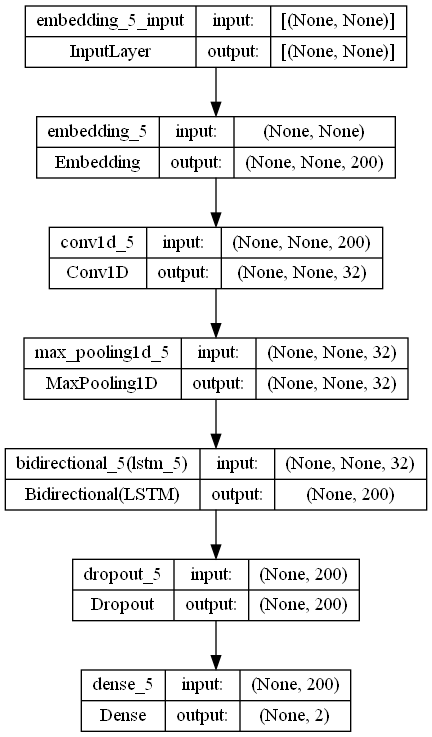

In [133]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

In [134]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [135]:
%%time

EPOCH = epochs
BATCH_SIZE = 32

history_LSTM = model.fit(train_seqs, trainY, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(val_seqs, valY))

Epoch 1/35
15/15 [==============================] - 22s 1s/step - loss: 0.6139 - accuracy: 0.7140 - val_loss: 0.5439 - val_accuracy: 0.7688
Epoch 2/35
15/15 [==============================] - 13s 844ms/step - loss: 0.5724 - accuracy: 0.7307 - val_loss: 0.5195 - val_accuracy: 0.7688
Epoch 3/35
15/15 [==============================] - 13s 830ms/step - loss: 0.5588 - accuracy: 0.7307 - val_loss: 0.5260 - val_accuracy: 0.7688
Epoch 4/35
15/15 [==============================] - 12s 820ms/step - loss: 0.5250 - accuracy: 0.7349 - val_loss: 0.5270 - val_accuracy: 0.7563
Epoch 5/35
15/15 [==============================] - 13s 836ms/step - loss: 0.5038 - accuracy: 0.7474 - val_loss: 0.5135 - val_accuracy: 0.7937
Epoch 6/35
15/15 [==============================] - 13s 834ms/step - loss: 0.4606 - accuracy: 0.7829 - val_loss: 0.5470 - val_accuracy: 0.7500
Epoch 7/35
15/15 [==============================] - 12s 817ms/step - loss: 0.4137 - accuracy: 0.8017 - val_loss: 0.5776 - val_accuracy: 0.7812
Ep

In [136]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

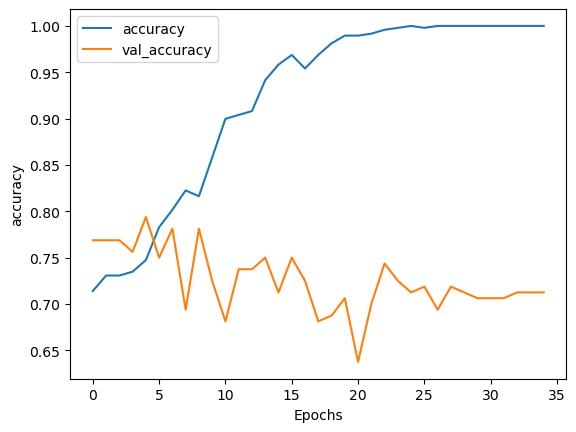

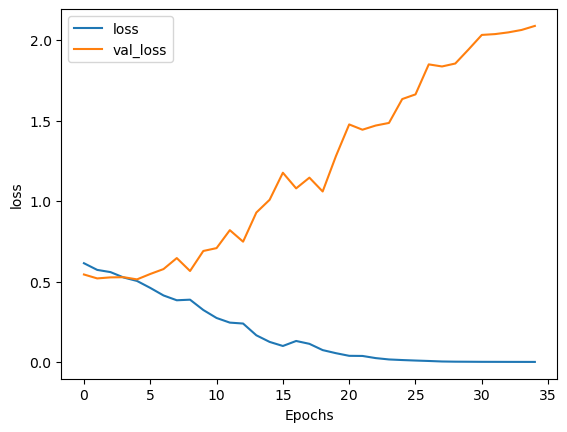

In [137]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [138]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.713987 	   0.613938 	   0.768750 	   0.543943
       2   0.730689 	   0.572436 	   0.768750 	   0.519539
       3   0.730689 	   0.558754 	   0.768750 	   0.525999
       4   0.734864 	   0.525035 	   0.756250 	   0.527008
       5   0.747390 	   0.503805 	   0.793750 	   0.513499
       6   0.782881 	   0.460625 	   0.750000 	   0.547039
       7   0.801670 	   0.413678 	   0.781250 	   0.577590
       8   0.822547 	   0.383759 	   0.693750 	   0.645868
       9   0.816284 	   0.387439 	   0.781250 	   0.565560
      10   0.858038 	   0.323318 	   0.725000 	   0.689967
      11   0.899791 	   0.273697 	   0.681250 	   0.707814
      12   0.903967 	   0.244919 	   0.737500 	   0.819267
      13   0.908142 	   0.239217 	   0.737500 	   0.747753
      14   0.941545 	   0.166105 	   0.750000 	   0.928795
      15   0.958246 	   0.125103 	   0.712500 	   1.008016
      16   0.968685 	   0.099763 	   0.750000 

In [139]:
y_pred = np.argmax(model.predict(test_seqs), axis=1)
y_true = np.argmax(testY, axis=1)

loss, accuracy = model.evaluate(test_seqs, testY)

5/5 [==============================] - 1s 41ms/step - loss: 1.4995 - accuracy: 0.7812


In [140]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.39      0.46      0.43        28
           1       0.88      0.85      0.86       132

    accuracy                           0.78       160
   macro avg       0.64      0.66      0.65       160
weighted avg       0.80      0.78      0.79       160

